In [ ]:
!pip install graphviz
!pip install transformers
!pip install bert
!pip install bert-tensorflow
!pip install keras
!pip install dask_ml
!pip install xgboost
!pip install datascroller
!pip install tensorflow

In [22]:
# Import relevant packages
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pickle
import time
import timeit

# Import dask packages
# import dask.dataframe as ddf
from math import nan
import panel as pn
import dask
import dask.array as da
import dask.dataframe as dd
from dask.delayed import delayed
import seaborn as sns
import matplotlib.pyplot as plt
from dask_ml.model_selection import train_test_split
import graphviz
from datascroller import scroll

from dask.diagnostics import ProgressBar
ProgressBar().register()

# text processing libraries
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import json
import os
import sys
import glob
import tensorflow as tf

import transformers as ppb
from time import time
import io
import re
from csv import reader

import bert
# from bert import run_classifier
# from bert import optimization
from bert import tokenization
from transformers import RobertaTokenizer, TFRobertaModel

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from tensorflow import keras
#### if use tensorflow=2.0.0, then import tensorflow.keras.model_selection 
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.backend import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RepeatedStratifiedKFold



from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import data. Importing all data to build the first stage model to predict 2 digit HS codes.

In [3]:
!ls /data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter

hs_code_chap_to_keep.csv  sample_chap_39.parq  sample_chap_74.parq
sample_chap_10.parq	  sample_chap_40.parq  sample_chap_75.parq
sample_chap_11.parq	  sample_chap_47.parq  sample_chap_76.parq
sample_chap_12.parq	  sample_chap_48.parq  sample_chap_78.parq
sample_chap_13.parq	  sample_chap_49.parq  sample_chap_79.parq
sample_chap_14.parq	  sample_chap_50.parq  sample_chap_80.parq
sample_chap_15.parq	  sample_chap_51.parq  sample_chap_81.parq
sample_chap_16.parq	  sample_chap_52.parq  sample_chap_82.parq
sample_chap_17.parq	  sample_chap_53.parq  sample_chap_83.parq
sample_chap_18.parq	  sample_chap_54.parq  sample_chap_84.parq
sample_chap_19.parq	  sample_chap_55.parq  sample_chap_85.parq
sample_chap_20.parq	  sample_chap_56.parq  sample_chap_86.parq
sample_chap_21.parq	  sample_chap_57.parq  sample_chap_87.parq
sample_chap_22.parq	  sample_chap_58.parq  sample_chap_88.parq
sample_chap_28.parq	  sample_chap_59.parq  sample_chap_89.parq
sample_chap_29.parq	  sample_chap_60.parq  sample_c

In [2]:
# first sample
# import_df = dd.read_parquet('/data/common/trade_data/2019/data_samples/sample_87128714.parq', engine='fastparquet', chunksize="100MB")

# updated sample with the multple hs codes entries removed
# import_df = dd.read_parquet('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_ignore_multiple_hscode_chap39_40.parq', engine='fastparquet', chunksize="100MB")
files1 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_1*.parq')
files2 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_2*.parq')
files3 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_3*.parq')
files4 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_4*.parq')
files5 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_5*.parq')
files6 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_6*.parq')
files7 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_7*.parq')
files8 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_8*.parq')
files9 = glob.glob('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter/sample_chap_9*.parq')

all_files = files1 + files2 + files3 + files4 + files5 + files6 + files7 + files8 + files9
import_df = pd.concat([pd.read_parquet(fp) for fp in all_files])

# import_df = pd.read_parquet('/data/common/trade_data/2019_updated/data_samples_ignore_multiple_hscode/sample_by_chapter')

In [ ]:
all_files


In [6]:
import_df.columns

Index(['System Identity Id', 'Estimate Arrival Date', 'Actual Arrival Date',
       'Bill of Lading', 'Master Bill of Lading', 'Bill Type Code',
       'Carrier SASC Code', 'Vessel Country Code', 'Vessel Code',
       'Vessel Name', 'Voyage', 'Inbond Type', 'Manifest No',
       'Mode of Transportation', 'Loading Port', 'Last Vist Foreign Port',
       'US Clearing District', 'Unloading Port', 'Place of Receipt', 'Country',
       'Country Sure Level', 'Weight in KG', 'Weight', 'Weight Unit', 'TEU',
       'Quantity', 'Quantity Unit', 'Measure in CM', 'Measure', 'Measure Unit',
       'Container Id', 'Container Size', 'Container Type',
       'Container Desc Code', 'Container Load Status',
       'Container Type of Service', 'Shipper Name', 'Shipper Address ',
       'Raw Shipper Name', 'Raw Shipper Addr1', 'Raw Shipper Addr2',
       'Raw Shipper Addr3', 'Raw Shipper Addr4', 'Raw Shipper Addr Others',
       'Consignee Name', 'Consignee Address ', 'Raw Consignee Name',
       'Raw Con

In [3]:
# Don't truncate text fields in the display
pd.set_option("display.max_colwidth", -1)

import_df.head(2)

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,Marks & Numbers,HS Code,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,Cleaned_HS_Code,HS_Code,Merged_Description
193322,6003201908300000674681,20190828,20190829,ZIMUTRT0102730,None,R,"ZIMU, ZIM ISRAEL NAVIGATION CO",SG,9366500,ASIATIC HORIZON,...,NO MARKS<br/>,150110,8,533600.0,Y,Y,END,150110,150110,"Pig fat (including lard) and poultry fat, other than that of heading 0209 or 1503 ;Lard"
489756,6003201904090000598510,20190408,20190408,TSCW13645275,None,R,"TSCW, TROPICAL SHIPPING & CONSTRUCTION CO",PA,9809904,TROPIC HOPE,...,BSIU9477265<br/>,150110,8,0.0,Y,Y,END,150110,150110,"Pig fat (including lard) and poultry fat, other than that of heading 0209 or 1503 ;Lard"


In [3]:
len(import_df.index)

1982138

In [4]:
df1 = import_df[['Product Desc', 'Cleaned_HS_Code']]
df1.columns = ['Desc', 'HSCode']

print(df1.head(2))
print(len(df1))

                                                     Desc  HSCode
193322  SUPREME ALL PURPOSE LARD IN PAILS 37LBS CAED N...  150110
489756  SLAC: 840 PAILS NABORI ALL PURPOSE LARD HS COD...  150110
1982138


In [5]:
# test = df1.HSCode.iloc[[1]]
# test

In [6]:
hs_code_desc = import_df[['Cleaned_HS_Code', 'Merged_Description']]
hs_code_desc = hs_code_desc.drop_duplicates()
hs_code_desc.columns = ['HSCode', 'Desc']
print(hs_code_desc.head(2))
print(len(hs_code_desc))

        HSCode                                               Desc
193322  150110  Pig fat (including lard) and poultry fat, othe...
485667  150120  Pig fat (including lard) and poultry fat, othe...
4137


In [7]:
df1 = df1.append(hs_code_desc[['Desc', 'HSCode']]).reset_index()
df1['HSChap'] = df1['HSCode'].astype(str).str[:2]
len(df1)

1986275

In [8]:
df1.head(2)

,index,Desc,HSCode,HSChap
0,193322,SUPREME ALL PURPOSE LARD IN PAILS 37LBS CAED N...,150110,15
1,489756,SLAC: 840 PAILS NABORI ALL PURPOSE LARD HS COD...,150110,15


In [9]:
# convert the dataframes back to pandas

# df1_pd = df1.compute()
# len(df1_pd)

In [10]:
df1_pd = df1

Remove long number sequences (that potentially contain HS Codes) from the descriptions.

In [11]:
df1_pd['Desc'] = [re.sub('\d{4,}', '', x) for x in df1_pd['Desc']]

df1_pd['Desc_orig'] = df1_pd['Desc']
df1_pd['Desc'] = df1_pd['Desc_orig'].str.split('<br/>').str[0]
df1_pd['Desc'] = [re.sub('<br/>', '', x) for x in df1_pd['Desc']]

### Let's create a smaller sample set with samples from each chapter

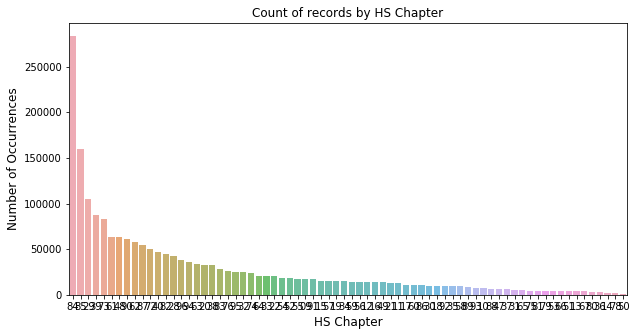

In [12]:
chap_count = df1_pd['HSChap'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(chap_count.index, chap_count.values, alpha=0.8)
plt.title('Count of records by HS Chapter')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HS Chapter', fontsize=12)
plt.show()

In [13]:
chap_count.head()

84    283591
85    159502
29    104937
39     87014
73     82828
Name: HSChap, dtype: int64

In [14]:
chap_count.tail()

80    2633
36    2539
14    2152
78    1898
50    1214
Name: HSChap, dtype: int64

In [15]:
df1_pd_samp = df1_pd.sample(frac=0.05, weights = df1_pd['HSChap'])
len(df1_pd_samp.index)

99314

In [37]:
df1_pd_samp.head()

,index,Desc,HSCode,HSChap,Desc_orig
417671,1043181,"AUTOMOTIVE SPARE PARTS HS-CODES , , , , , , , , , HBL BANQBRE",391739,39,"AUTOMOTIVE SPARE PARTS HS-CODES , , , , , , , , , HBL BANQBRE<br/>"
1851082,448971,ASSEMBLED BAGG,911012,91,ASSEMBLED BAGG<br/>ASSEMBLED BAGG<br/>ASSEMBLED BAGG<br/>ASSEMBLED BAGG<br/>ASSEMBLED BAGG<br/>ASSEMBLED BAGG<br/>
88222,287017,"COOKIES, WAFERS HS CODE ,",190531,19,"COOKIES, WAFERS HS CODE , <br/>"
525007,812693,COVERLET HS CODE: GELOCAST HS CODE:,300510,30,COVERLET HS CODE: GELOCAST HS CODE: <br/>
1924452,120104,HEB BLK POLYBAND HAIR ELASTICS . . . . . . HEB 24PC DF LRG MC ELSTC BNDS . . . . . . HEB CLEAR HAIR ELASTICS . . . . . . HEB 30PC ELASTICS W.CRIMP . . . . . . HEB 24PC DF LRG ELSTC BND BLK . . . . . . HEB 4MM ELASTIC BLACK 18 CT . . . . . . HEB CLEAR HAIR ELASTICS . . . . . . HEB 60PC BOBBY PINS BROWN . . . . . . HEB 60PC BOBBY PINS BLACK . . . . . . HEB 24PC DF LRG ELSTC BND BLK . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .,961590,96,HEB BLK POLYBAND HAIR ELASTICS . . . . . . HEB 24PC DF LRG MC ELSTC BNDS . . . . . . HEB CLEAR HAIR ELASTICS . . . . . . HEB 30PC ELASTICS W.CRIMP . . . . . . HEB 24PC DF LRG ELSTC BND BLK . . . . . . HEB 4MM ELASTIC BLACK 18 CT . . . . . . HEB CLEAR HAIR ELASTICS . . . . . . HEB 60PC BOBBY PINS BROWN . . . . . . HEB 60PC BOBBY PINS BLACK . . . . . . HEB 24PC DF LRG ELSTC BND BLK . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .<br/>


### Create train, dev, and test sets

In [16]:
X_pd = df1_pd_samp

In [17]:
y_pd = X_pd['HSChap']
len(y_pd)

99314

In [18]:
X_pd['HSChap'].nunique()

72

In [19]:
# X = X_pd['Desc']
y = X_pd['HSChap']

# Split once to create the test set
X_temp, X_test, y_temp, y_test = train_test_split(X_pd, y, test_size=0.2, random_state=91)

# Re-split the train set to create a dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_pd, y, test_size=0.2, random_state=91, stratify=y)

print('Size of the train set is', len(X_train))
print('Size of the dev set is', len(X_dev))
print('Size of the test set is', len(X_test))
print('Size of the train label set is', len(y_train))
print('Size of the dev label set is', len(y_dev))
print('Size of the test label set is', len(y_test))


Size of the train set is 79451
Size of the dev set is 19863
Size of the test set is 19863
Size of the train label set is 79451
Size of the dev label set is 19863
Size of the test label set is 19863


In [42]:
X_train.head(2)

,index,Desc,HSCode,HSChap,Desc_orig
672541,537172,"SHIPPER S LOAD, COUNT & SEAL (27CTNS) CY / CY MOA RAINBOW COLOR STAMP-6 COLORS S/C: AMS:PP CNT THIS SHIPMENT CONTAINS NO WOOD PACKAGING MATERIALS ++++ LINDEN BLVD 3RD FLOOR ELMONTY, NY TEL: 516-872- FAX:516-872- FREIGHT COLLECT",551331,55,"SHIPPER S LOAD, COUNT & SEAL (27CTNS) CY / CY MOA RAINBOW COLOR STAMP-6 COLORS S/C: AMS:PP CNT THIS SHIPMENT CONTAINS NO WOOD PACKAGING MATERIALS ++++ LINDEN BLVD 3RD FLOOR ELMONTY, NY TEL: 516-872- FAX:516-872- FREIGHT COLLECT<br/>"
1846443,290911,"IKEA HOME FURNITURE AND HOME FURNISHING PRODUCTS SHIPPER DECLARED THAT THIS SHIPMENT CONTAINS NO SOLID WOOD PACKING MATERIAL SHIPPER S LOAD, STOW, WEIGHT AND COUNT REC NO.345 SHIPMENT ID:516-CP-S 192 SETS SUPPLIER NO. CONSIGNMENT NO.ECIS IKEA HOME FURNITURE AND HOME FURNISHING PRODUCTS H.S. CODE",910521,91,"IKEA HOME FURNITURE AND HOME FURNISHING PRODUCTS SHIPPER DECLARED THAT THIS SHIPMENT CONTAINS NO SOLID WOOD PACKING MATERIAL SHIPPER S LOAD, STOW, WEIGHT AND COUNT REC NO.345 SHIPMENT ID:516-CP-S 192 SETS SUPPLIER NO. CONSIGNMENT NO.ECIS IKEA HOME FURNITURE AND HOME FURNISHING PRODUCTS H.S. CODE <br/>"


In [43]:
X_dev.head(2)

,index,Desc,HSCode,HSChap,Desc_orig
871269,81238,"WEARING APPARELS HTS NO.: 61 READYMADE GARM ENTS. TODDLER GIRLS / INFANT S COTTON KNIT PANTS, WITH 5% OR MORE SPANDEX DPO. NO. ST YLE NO. TG25O7A -04 INVOICE NO.: AGL260B DAT E: 04-11- EXP NO.: / / DATE: 04-11- CONT. NO. MOU#: BD DT 23. 08. FCR# CHT- 8 RELAY VESSEL MAERSK SE NTOSA 947W CONTAINER S UMMARY --------------------- -------------- MSKU MLBD 45X9 6 76CTN 5.246CBM .890KGS B/L TO TAL SUMMARY ---------------- ------------------- 76CTN 5. 246CBM .890KGS",610462,61,"WEARING APPARELS HTS NO.: 61 READYMADE GARM ENTS. TODDLER GIRLS / INFANT S COTTON KNIT PANTS, WITH 5% OR MORE SPANDEX DPO. NO. ST YLE NO. TG25O7A -04 INVOICE NO.: AGL260B DAT E: 04-11- EXP NO.: / / DATE: 04-11- CONT. NO. MOU#: BD DT 23. 08. FCR# CHT- 8 RELAY VESSEL MAERSK SE NTOSA 947W CONTAINER S UMMARY --------------------- -------------- MSKU MLBD 45X9 6 76CTN 5.246CBM .890KGS B/L TO TAL SUMMARY ---------------- ------------------- 76CTN 5. 246CBM .890KGS<br/>"
806163,1088683,"DRESSES GIRLS 60% COTTON 40% POLYESTER KNITTED DRESSES PO NBR SKU NBR NIL . . . . . . . 195CTN 343.25KGS 3.522CBM SHIPPER ++ O/B THIEN CHI COMPANY LIMITED 45 PHAM VAN SANG STREET, HAMLET 2, XUAN THOI THUONG VILLAGE, HOC MON DISTRICT, HO CHI MINH CITY, VIETNAM. HO CHI MINH CITY, VIETNAM CONSIGNEE ++ PHONE 262-703- CTC TRACY SCHROEDER PHONE 262-703- NOTIFY PARTY ++ FAX 1 (310) EMAIL LAX-STATEMENTS@EXPEDITORS.COM SHIPPER DECLARE THAT THIS SHIPMENT CONTAINS NO WOOD PACKAGING MATERIALS",620449,62,"DRESSES GIRLS 60% COTTON 40% POLYESTER KNITTED DRESSES PO NBR SKU NBR NIL . . . . . . . 195CTN 343.25KGS 3.522CBM SHIPPER ++ O/B THIEN CHI COMPANY LIMITED 45 PHAM VAN SANG STREET, HAMLET 2, XUAN THOI THUONG VILLAGE, HOC MON DISTRICT, HO CHI MINH CITY, VIETNAM. HO CHI MINH CITY, VIETNAM CONSIGNEE ++ PHONE 262-703- CTC TRACY SCHROEDER PHONE 262-703- NOTIFY PARTY ++ FAX 1 (310) EMAIL LAX-STATEMENTS@EXPEDITORS.COM SHIPPER DECLARE THAT THIS SHIPMENT CONTAINS NO WOOD PACKAGING MATERIALS<br/>"


## Create baseline of predicting the majority class

In [20]:
counts = X_train['HSChap'].value_counts().to_dict()
# print(counts)
max_value = max(counts.values())
print('Accuracy when predicting majority class ', max_value/len(X_train))

Accuracy when predicting majority class  0.19240789920831708


## Create functions to make model building easier

In [37]:
# # column_names = ['Model Name', 'Accuracy', 'Precision', 'Recall']
# # results = pd.DataFrame(columns = column_names)

# results = pd.DataFrame()
# results = pd.DataFrame(index = ['Baseline', 'NB-BOW Desc','NB-tfidf Desc', 'LogReg-BOW Desc', 'LogReg-tfidf Desc', 
#                                 'SVM-BOW Desc', 'SVM-tfidf Desc', 'XGBoost-BOW Desc', 'XGBoost-tfidf Desc', 'RF-BOW Desc', 'RF-tfidf Desc'],
#                        columns=['Accuracy'])

In [ ]:
# results

In [39]:
# results.at['Baseline', 'Accuracy'] = max_value/len(X_train)

### Train  and save the models

In [42]:
# def train(classifier, X, y, X_test, y_test, filename):
#     ### provide classifier, train and test set
#     ### get train/val split
#     ### fit on val
#     ### test on test
#     ### return accuracy score for test
#     tic = time()
#     mod = classifier.fit(X, y)
#     toc = time()
#     print(f"Trained model in {toc - tic:0.4} seconds")
    
#     # save model parameters
# #     filename = classifier([('vectorizer')])+'_model.sav'
#     pickle.dump(mod, open(filename, 'wb'))
    
#     print("Dev set results:")
#     tic = time()
#     X_test_preds = mod.predict(X_test)
#     toc = time()
#     print(classification_report(y_test, X_test_preds) )
#     # plot confusion matrix
# #     plt.figure(figsize=(30,30))
# #     plot_confusion_matrix(mod, y_test, X_test_preds)
# #     plt.show()
#     # print confusion matrix
# #     print(confusion_matrix(y_test, X_test_preds))
#     print(f"Created predictions in {toc - tic:0.4} seconds")
#     print("Model accurayc: ",accuracy_score(y_test,X_test_preds))
#     return accuracy_score(y_test,X_test_preds)

### Let's do gridsearch on the logistic regression model

In [24]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', LogisticRegression()),
])


cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)

# Create param grid.

param_grid = [
    {'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
     'classifier__class_weight' : ['balanced']}
    ]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = cv, verbose=True, n_jobs=-1)

# Fit on data

tic = time()
grid_result = clf.fit(X_train['Desc'], y_train)
toc = time()
print(f"Performed gridsearch for model in {toc - tic:0.4} seconds")
# print(f"Created predictions in {toc - tic:0.4} seconds")


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 6 folds for each of 40 candidates, totalling 240 fits
Performed gridsearch for model in 7.219e+03 seconds
Best: 0.568120 using {'classifier__C': 11.288378916846883, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
nan (nan) with: {'classifier__C': 0.0001, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1'}
0.124450 (0.006182) with: {'classifier__C': 0.0001, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
nan (nan) with: {'classifier__C': 0.00026366508987303583, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1'}
0.141777 (0.004206) with: {'classifier__C': 0.00026366508987303583, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
nan (nan) with: {'classifier__C': 0.0006951927961775605, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1'}
0.169031 (0.003591) with: {'classifier__C': 0.0006951927961775605, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}


In [27]:
print("Dev set results:")
tic = time()
X_dev_preds = grid_result.predict(X_dev['Desc'])
toc = time()
print(classification_report(y_dev, X_dev_preds) )


Dev set results:
              precision    recall  f1-score   support

          09       0.50      0.41      0.45        27
          10       0.57      0.33      0.42        12
          11       0.50      0.46      0.48        26
          12       0.24      0.29      0.26        28
          13       0.40      0.25      0.31         8
          14       0.60      0.50      0.55         6
          15       0.55      0.63      0.59        35
          16       0.57      0.59      0.58        34
          17       0.53      0.47      0.50        36
          18       0.67      0.50      0.57        28
          19       0.44      0.47      0.46        49
          20       0.56      0.54      0.55       109
          21       0.30      0.33      0.31        42
          22       0.57      0.66      0.61        73
          28       0.56      0.60      0.58       197
          29       0.51      0.49      0.50       502
          30       0.55      0.65      0.59        51
          

In [43]:
trial1 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial1, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/NB_BOW_model_HSChap.sav')

results.at['NB-BOW Desc','Accuracy'] = acc
# results = results.append(pd.DataFrame([['MNB_BOW'] + acc], columns=column_names), ignore_index=True)

Trained model in 6.797 seconds
Dev set results:
              precision    recall  f1-score   support

          09       0.00      0.00      0.00        54
          10       1.00      0.12      0.21        26
          11       1.00      0.02      0.04        48
          12       0.67      0.03      0.07        58
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00        10
          15       1.00      0.10      0.19        77
          16       0.67      0.18      0.29        87
          17       0.50      0.02      0.03        64
          18       0.75      0.10      0.17        62
          19       0.73      0.17      0.27        96
          20       0.64      0.36      0.46       216
          21       0.70      0.07      0.13        96
          22       0.73      0.41      0.53       148
          28       0.80      0.22      0.35       393
          29       0.44      0.47      0.45      1022
          30       0.45      0.09

In [44]:
trial2 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
acc = train(trial2, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/NB_tfidf_model_HSChap.sav')

results.at['NB-tfidf Desc','Accuracy'] = acc
# results = results.append(pd.DataFrame([['MNB_tfidf'] + acc], columns=column_names), ignore_index=True)

Trained model in 6.791 seconds
Dev set results:
              precision    recall  f1-score   support

          09       0.00      0.00      0.00        54
          10       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        58
          13       0.00      0.00      0.00        17
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        77
          16       0.00      0.00      0.00        87
          17       0.00      0.00      0.00        64
          18       0.00      0.00      0.00        62
          19       0.00      0.00      0.00        96
          20       0.75      0.01      0.03       216
          21       0.00      0.00      0.00        96
          22       1.00      0.02      0.04       148
          28       0.91      0.05      0.10       393
          29       0.71      0.20      0.31      1022
          30       0.00      0.00

In [ ]:
# trial3 = Pipeline([
#     ('vectorizer', CountVectorizer(stop_words='english')),
#     ('classifier', KNeighborsClassifier()),
# ])
 
# acc = train(trial3, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/KNN_BOW_model_HSChap.sav')

# results.at['KNN-BOW Desc','Accuracy'] = acc

In [ ]:
# trial4 = Pipeline([
#     ('vectorizer', TfidfVectorizer(stop_words='english')),
#     ('classifier', KNeighborsClassifier()),
# ])
 
# acc = train(trial4, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/KNN_tfidf_model_HSChap.sav')

# results.at['KNN-tfidf Desc','Accuracy'] = acc

In [45]:
trial5 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial5, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/LogReg_BOW_model_HSChap.sav')

results.at['LogReg-BOW Desc','Accuracy'] = acc

Trained model in 339.9 seconds
Dev set results:
              precision    recall  f1-score   support

          09       0.46      0.33      0.39        54
          10       0.47      0.31      0.37        26
          11       0.60      0.50      0.55        48
          12       0.62      0.34      0.44        58
          13       0.80      0.24      0.36        17
          14       0.25      0.10      0.14        10
          15       0.77      0.52      0.62        77
          16       0.69      0.64      0.67        87
          17       0.68      0.36      0.47        64
          18       0.75      0.39      0.51        62
          19       0.72      0.51      0.60        96
          20       0.76      0.62      0.69       216
          21       0.67      0.32      0.44        96
          22       0.78      0.69      0.73       148
          28       0.68      0.55      0.61       393
          29       0.59      0.52      0.55      1022
          30       0.66      0.45

In [46]:
trial6 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier',LogisticRegression()),
])
 
acc = train(trial6, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/LogReg_tfidf_model_HSChap.sav')

results.at['LogReg-tfidf Desc','Accuracy'] = acc

Trained model in 347.6 seconds
Dev set results:
              precision    recall  f1-score   support

          09       0.40      0.22      0.29        54
          10       1.00      0.12      0.21        26
          11       1.00      0.04      0.08        48
          12       0.69      0.31      0.43        58
          13       1.00      0.06      0.11        17
          14       0.00      0.00      0.00        10
          15       0.77      0.39      0.52        77
          16       0.55      0.46      0.50        87
          17       1.00      0.08      0.14        64
          18       0.79      0.24      0.37        62
          19       0.96      0.26      0.41        96
          20       0.65      0.56      0.60       216
          21       0.68      0.14      0.23        96
          22       0.84      0.59      0.69       148
          28       0.68      0.46      0.55       393
          29       0.55      0.50      0.52      1022
          30       0.70      0.16

In [ ]:
trial7 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', SVC(probability=True, class_weight='balanced', verbose=True)),
])
 
acc = train(trial7, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/SVM_BOW_model_HSChap.sav')

results.at['SVM-BOW Desc','Accuracy'] = acc

[LibSVM]

In [ ]:
trial8 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', SVC()),
])
 
acc = train(trial8, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/SVM_tfidf_model_HSChap.sav')

results.at['SVM-tfidf Desc','Accuracy'] = acc

In [ ]:
trial9 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial9, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/XGB_BOW_model_HSChap.sav')

results.at['XGBoost-BOW Desc','Accuracy'] = acc

In [ ]:
trial10 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', XGBClassifier()),
])
 
acc = train(trial10, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/XGB_tfidf_model_HSChap.sav')

results.at['XGBoost-tfidf Desc','Accuracy'] = acc

In [ ]:
trial11 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial11, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/RF_BOW_model_HSChap.sav')

results.at['RF-BOW Desc','Accuracy'] = acc

In [ ]:
trial12 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', RandomForestClassifier()),
])
 
acc = train(trial12, X_train['Desc'], y_train, X_dev['Desc'], y_dev, 'saved_models/RF_tfidf_model_HSChap.sav')

results.at['RF-tfidf Desc','Accuracy'] = acc

### Reload models, generate results

In [ ]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

def load_model(filename):
    loaded = pickle.load(open(filename, 'rb'))
    return loaded

In [ ]:
nb_bow_mod = load_model('saved_models/NB_BOW_model_HSChap.sav')
results.at['NB-BOW Desc','Accuracy'] = nb_bow_mod.score(X_dev['Desc'], y_dev)

nb_tfidf_mod = load_model('saved_models/NB_tfidf_model_HSChap.sav')
results.at['NB-tfidf Desc','Accuracy'] = nb_tfidf_mod.score(X_dev['Desc'], y_dev)

# knn_bow_mod = load_model('saved_models/KNN_BOW_HSChap.sav')
# results.at['KNN-BOW Desc','Accuracy'] = knn_bow_mod.score(X_dev['Desc'], y_dev)

# knn_tfidf_mod = load_model('saved_models/KNN_tfidf_HSChap.sav')
# results.at['KNN-tfidf Desc','Accuracy'] = knn_tfidf_mod.score(X_dev['Desc'], y_dev)



In [ ]:
lr_bow_mod = load_model('saved_models/LogReg_BOW_model_HSChap.sav')
results.at['LogReg-BOW Desc','Accuracy'] = lr_bow_mod.score(X_dev['Desc'], y_dev)

lr_tfidf_mod = load_model('saved_models/LogReg_tfidf_model_HSChap.sav')
results.at['LogReg-tfidf Desc','Accuracy'] = lr_tfidf_mod.score(X_dev['Desc'], y_dev)

rf_bow_mod = load_model('saved_models/RF_BOW_model_HSChap.sav')
results.at['RF-BOW Desc','Accuracy'] = rf_bow_mod.score(X_dev['Desc'], y_dev)

rf_tfidf_mod = load_model('saved_models/RF_tfidf_model_HSChap.sav')
results.at['RF-tfidf Desc','Accuracy'] = rf_tfidf_mod.score(X_dev['Desc'], y_dev)

In [ ]:
xgb_bow_mod = load_model('saved_models/XGB_BOW_model_HSChap.sav')
results.at['XGBoost-BOW Desc','Accuracy'] = xgb_bow_mod.score(X_dev['Desc'], y_dev)

xgb_tfidf_mod = load_model('saved_models/XGB_tfidf_model_HSChap.sav')
results.at['XGBoost-tfidf Desc','Accuracy'] = xgb_tfidf_mod.score(X_dev['Desc'], y_dev)

svm_bow_mod = load_model('saved_models/SVM_BOW_model_HSChap.sav')
results.at['SVM-BOW Desc','Accuracy'] = svm_bow_mod.score(X_dev['Desc'], y_dev)

svm_tfidf_mod = load_model('saved_models/SVM_tfidf_model_HSChap.sav')
results.at['SVM-tfidf Desc','Accuracy'] = svm_tfidf_mod.score(X_dev['Desc'], y_dev)

In [24]:
results

,Accuracy
Baseline,0.142775
NB-BOW Desc,0.549073
NB-tfidf Desc,0.406442
LogReg-BOW Desc,0.673295
LogReg-tfidf Desc,NaN
SVM-BOW Desc,NaN
SVM-tfidf Desc,NaN
XGBoost-BOW Desc,0.692175
XGBoost-tfidf Desc,NaN
RF-BOW Desc,NaN


In [ ]:
ax = sns.barplot(x=results.index, y=results["Accuracy"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=75)
plt.title("Model Comparison, Chapters 40 - 69", size=20)

In [ ]:
results.to_csv('ModelResults_Chps_40_69'+ '03032021' + '.csv', index=False)